In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

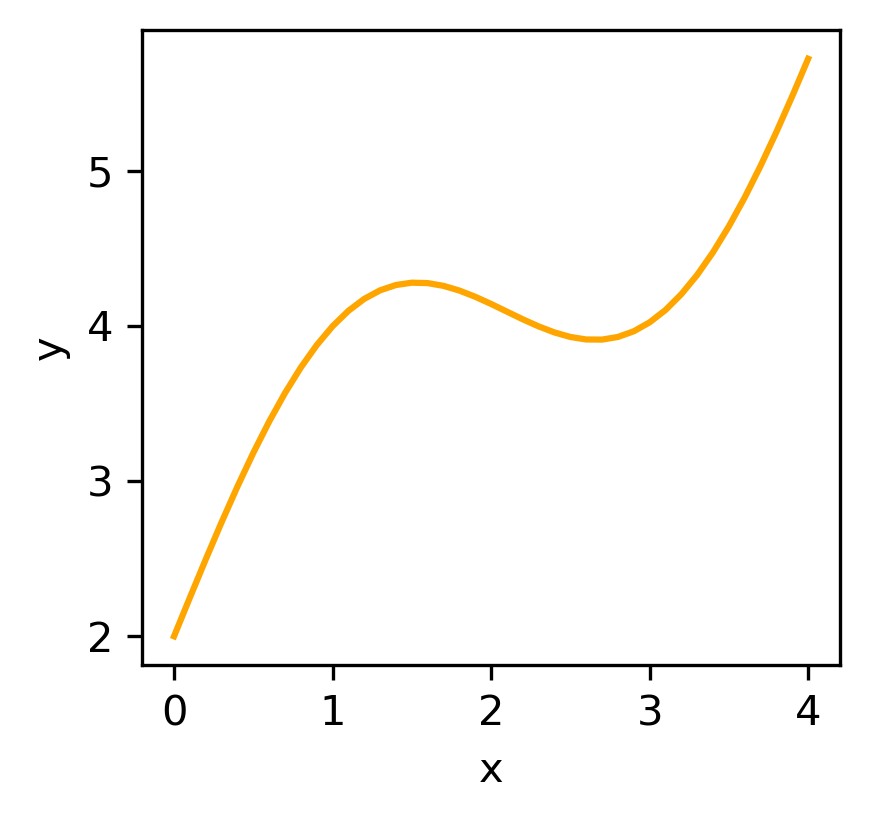

In [21]:
#Напишем простую нейросеть, которая будет апроксимировать некоторую функцию
x = torch.arange(0, 4.05, 0.1)
y = torch.sin(1.5*x) + x + 2
fig = plt.figure(figsize=(3, 2.75), dpi=300)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, color="orange")
plt.show()

In [62]:
from random import randint
#Обучим нс, которая будет апроксимировать y с Помощью SGD
w = torch.tensor([0.5, 0.5], dtype=torch.float32, requires_grad=True)
X = torch.cat([torch.ones(x.shape[0]).view(-1, 1), x.view(-1, 1)], dim=1)
lr = 0.05
for _ in range(2000):
    k = randint(1, X.shape[0]-1)
    predict = X[k] @ w
    loss = (predict - y[k])**2
    loss.backward()
    w.data = w.data - lr * w.grad
    w.grad.zero_()
print("Обучение нейронной сети завершено!")

Обучение нейронной сети завершено!


In [63]:
(X @ w).shape, x.shape

(torch.Size([41]), torch.Size([41]))

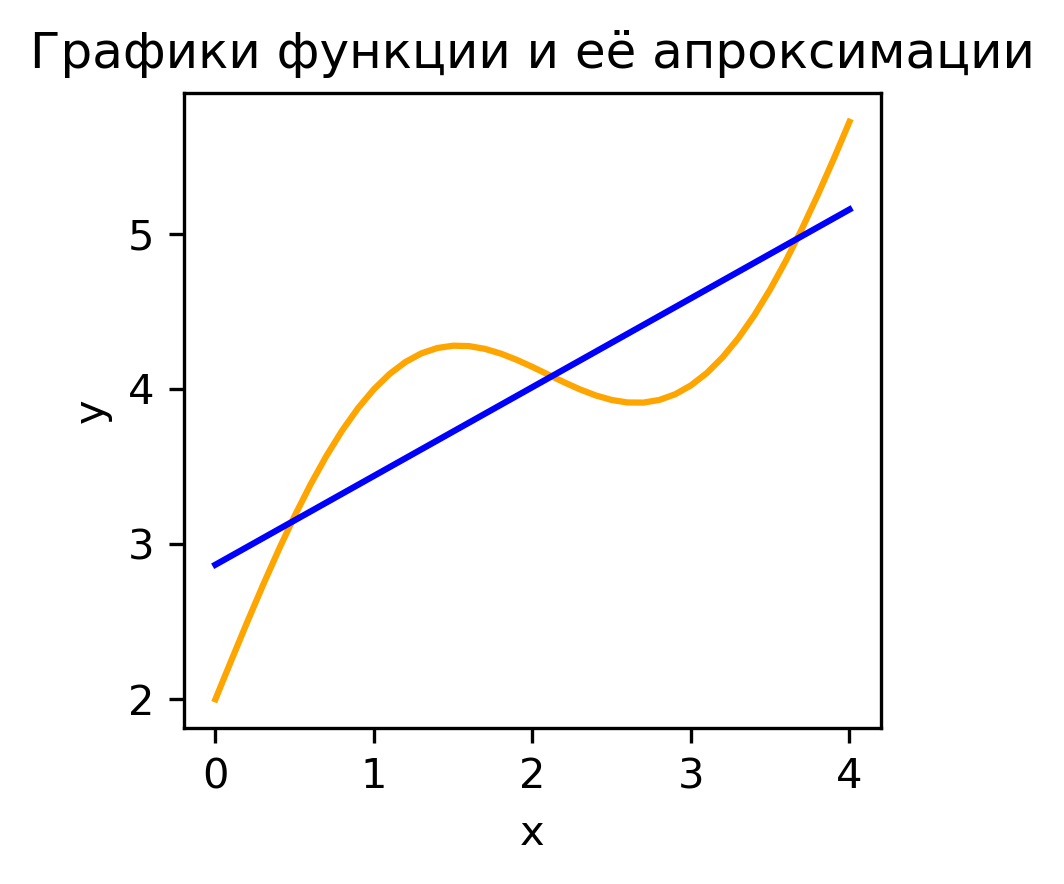

In [64]:
#Напишем простую нейросеть, которая будет апроксимировать некоторую функцию
x = torch.arange(0, 4.05, 0.1)
y = torch.sin(1.5*x) + x + 2
fig = plt.figure(figsize=(3, 2.75), dpi=300)
plt.title("Графики функции и её апроксимации")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, color="orange", label="Функция y")
plt.plot(x, (X @ w.data), color="blue", label="Наша функция")
plt.show()

In [91]:
import torch

def func(x):
    return 0.2 * (x - 2) ** 2 - 0.3 * torch.cos(4 * x)

x0 = 0.0 # начальное значение точки минимума
lr = 0.1 # шаг обучения
N = 200 # число итераций градиентного алгоритма
x = torch.tensor([x0], dtype=torch.float32, requires_grad=True)
for _ in range(N):
    func(x).backward()
    x.data = x.data - lr * x.grad
    x.grad.zero_()
print(x.data)

tensor([0.1646])


In [97]:
import torch
import torch.optim as optim

def func(x):
    return 0.2 * (x - 2) ** 2 - 0.3 * torch.cos(4 * x)


lr = 0.1 # шаг обучения
x0 = 0.0 # начальное значение точки минимума
N = 200 # число итераций градиентного алгоритма
x = torch.tensor([x0], dtype=torch.float32, requires_grad=True)
optimizer = optim.RMSprop(params=[x], lr=lr)
for _ in range(N):
    func(x).backward()
    optimizer.step()
    optimizer.zero_grad()

tensor([1.6554])


In [146]:
import numpy as np
import torch
import torch.optim as optim

n_features = 4 # число коэффициентов w
x = torch.arange(-3, 3, 0.1)
y_train = -0.1 * x + 0.2 * torch.sin(2 * x) - 0.1 * torch.cos(5 * x)
x_train = torch.tensor([[_x ** _n for _n in range(n_features)] for _x in x])

w = torch.FloatTensor(n_features).uniform_(-1e-5, 1e-5)
w.requires_grad_(True)

total = len(y_train)
lr = 0.01 # шаг обучения
N = 1000 # число итераций алгоритма SGD

np.random.seed(1) # установка "зерна" генератора датчика случайных чисел
loss = torch.nn.MSELoss()
optimizer = optim.RMSprop(params=[w], lr=lr)
for _ in range(N):
    k = np.random.randint(low=0, high=total)
    predict = x_train[k].squeeze() @ w
    error = loss(predict, y_train[k])
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
# здесь продолжайте программу
Q = loss(x_train @ w, y_train).item()

0.029087064787745476

In [164]:
import numpy as np
import torch
import torch.optim as optim

x_train = torch.tensor([(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)])
y_train = torch.tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])
y_train = y_train.float()

total = len(y_train) # размер обучающей выборки
n_features = 3 # число параметров w0, w1, w2
lr = 0.1 # шаг обучения
N = 500 # число итераций градиентного алгоритма

np.random.seed(1) # установка "зерна" генератора датчика случайных чисел

X = torch.ones(total, 3)
X[:, 1:3] = x_train # матрица формата [(1, x11, x12), (1, x21, x22), ..., (1, xn1, xn2)]

w = torch.empty(n_features).uniform_(-1e-5, 1e-5) # начальные значения вектора w
w.requires_grad_(True)

loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=[w], lr=lr)
for _ in range(N):
    k = np.random.randint(low=0, high=total)
    predict = X.squeeze()[k] @ w
    error = loss(predict, y_train[k])
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
pred = X @ w >= 0.0
Q = (torch.mean((pred == y_train).float())).item()

In [248]:
import numpy as np
import torch
import torch.optim as optim

def model(x, w1, w2, b1, b2):
    x = x @ w1.transpose(1, 0) + b1
    x = torch.tanh(x)
    x = x @ w2.permute(1, 0) + b2
    return x


np.random.seed(1) # установка "зерна" генератора датчика случайных чисел
torch.manual_seed(123)

W1 = torch.empty(2, 2).normal_(0, 1e-5)
bias1 = torch.rand(2, requires_grad=True)
W2 = torch.empty(1, 2).normal_(0, 1e-5)
bias2 = torch.rand(1, requires_grad=True)

W1.requires_grad_(True)
W2.requires_grad_(True)

# обучающая выборка
n_items = 20
C00 = torch.empty(n_items, 2).normal_(0, 1)
C11 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([5, 5])
C01 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([0, 5])
C10 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([5, 0])

x_train = torch.cat([C00, C11, C01, C10])
y_train = torch.cat([torch.ones(n_items * 2), torch.zeros(n_items * 2)])

lr = 0.01  # шаг обучения


In [261]:
import torch
import torch.nn as nn

class TwoLayerModel(nn.Module):
    def __init__(self, in_features, in_hidden, in_exit):
        super().__init__()
        self.layer1 = nn.Linear(in_features, in_hidden)
        self.layer2 = nn.Linear(in_hidden, in_exit)
    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        return self.layer2(x)

x = torch.rand(3) # тензор x в программе не менять

# здесь продолжайте программу
model = TwoLayerModel(3, 2, 1)
model.eval()
predict = model(x)

# Класс Dataset
* Класс Dataset нужен для того, чтобы получать данные, которые нужны только сейчас, чтобы не переполнять память
* В методе __init__ мы проделываем все необходимые преобразования
* В методе __getitem__ мы достаем один образ которые представляет собой кортеж (x_train, y_train)
* В методе __len__ возвращаем размерность нашей выборки
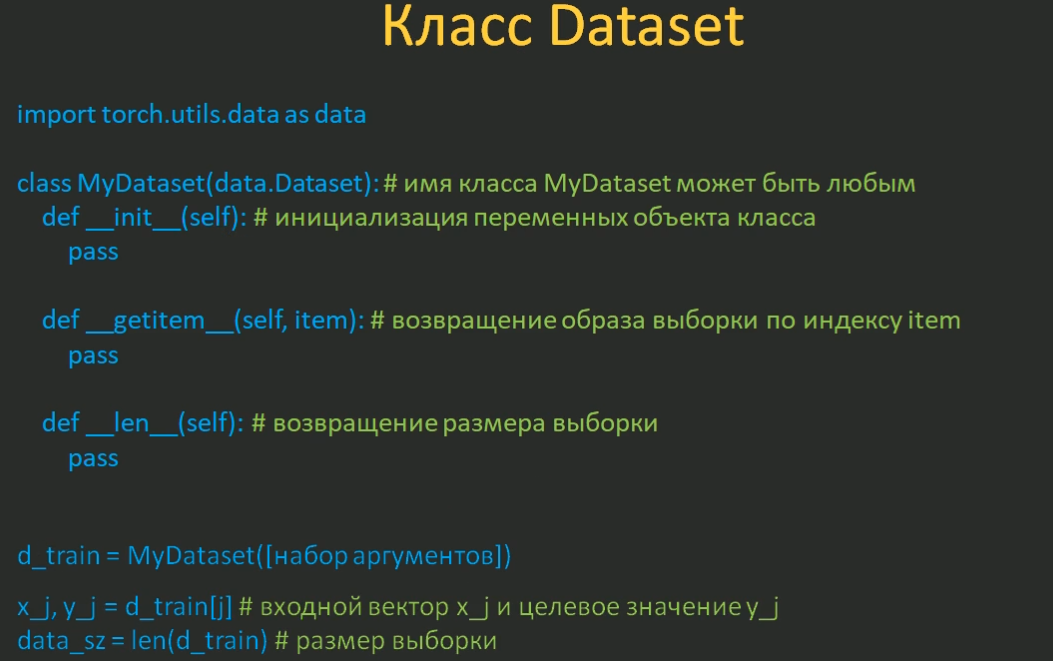

# Класс DataLoader
* Данный класс позволяет вытаскивать данны пакети, предварительно их перемешав
* Данный класс, возвращает генератор, элементы которого мы перебираем по циклу
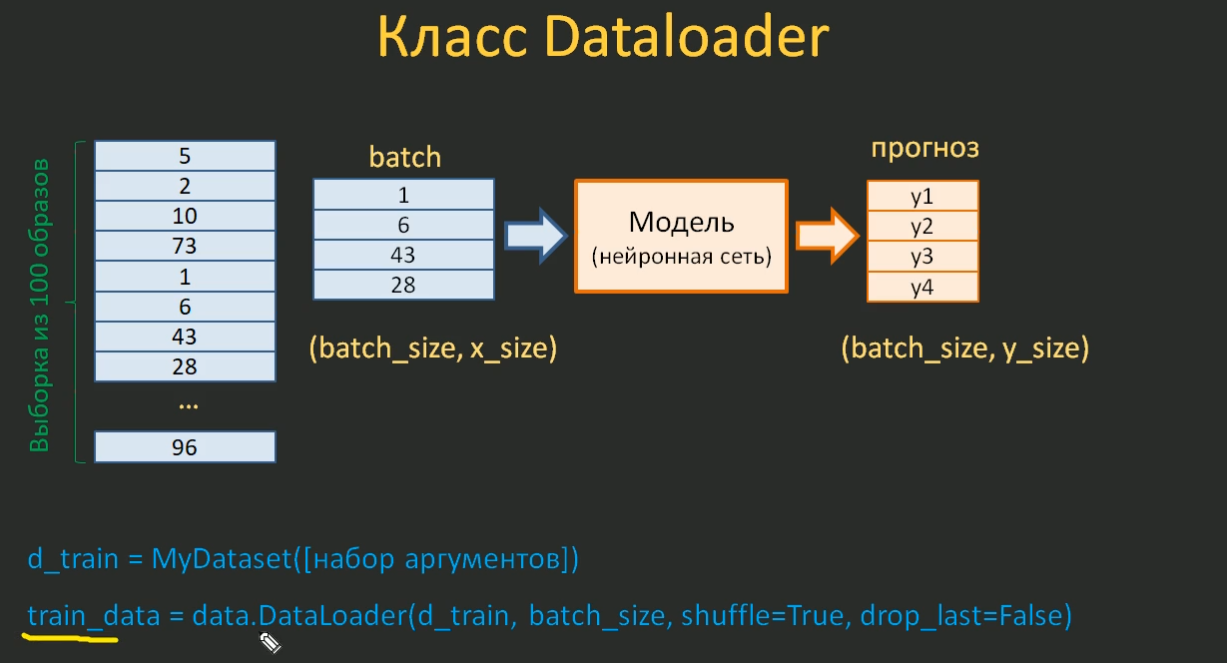

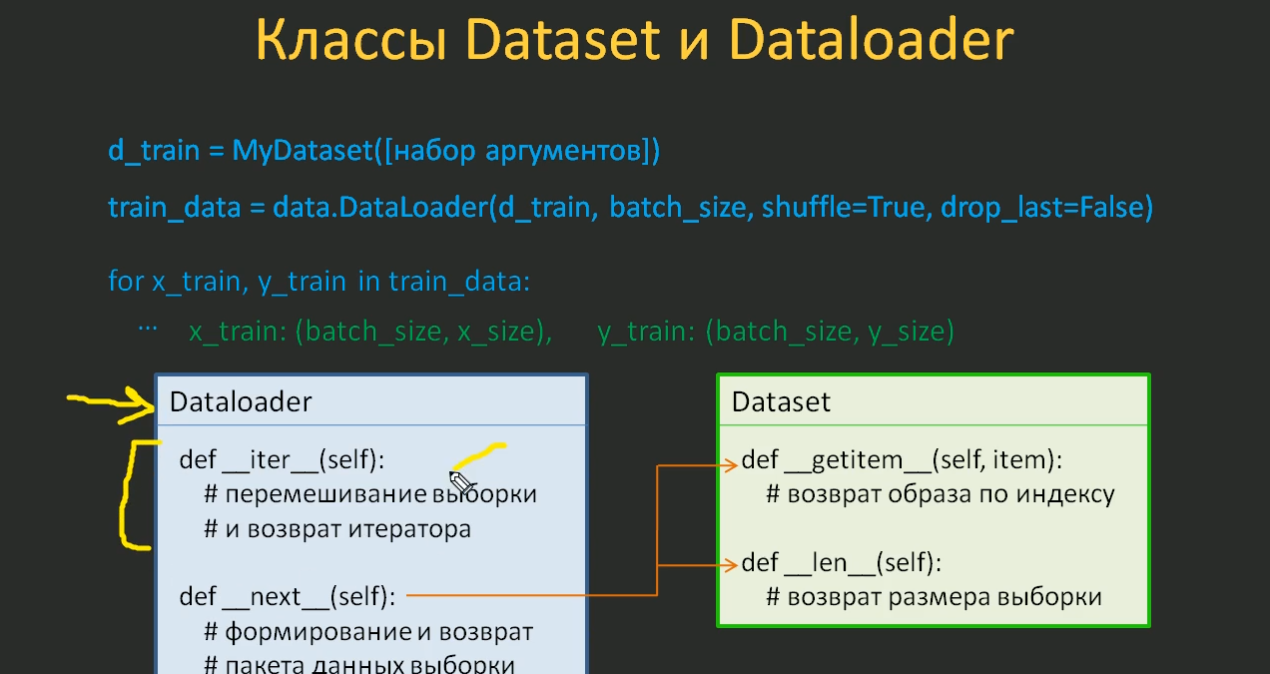